prerequisite: just make sure to have the callsf0d4f5a.csv, sentiment_statisticscc1e57a.csv, reason18315ff.csv the same csv files that were provided in the problem statement , also the thresholds taken in later in the code are mere examples and can be adjusted according to the user

In [22]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import pandas as pd

In [25]:
file_path = "callsf0d4f5a.csv"

In [26]:
df = pd.read_csv(file_path)

In [27]:
print(df.head())

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...  


In [28]:
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'])

In [29]:
df['call_duration'] = df['call_end_datetime'] - df['call_start_datetime']
df['agent_response_time'] = df['call_end_datetime'] - df['agent_assigned_datetime']

In [30]:
output_file_path = "updated_file.csv"
df.to_csv(output_file_path, index=False)

In [31]:
print(df.head())

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript   call_duration  \
0  \n\nAgent: Thank you for calling United Airlin... 0 days 00:38:00   
1  \n\nAgent: Thank you for calling United Airlin... 0 days 00:15:00   
2  \n\nAgent: Thank you for calling United Airlin... 0 days 00:27:00   
3  \n\nAgent: Thank you for calling United Airlin... 0 d

In [32]:
dp = pd.read_csv('sentiment_statisticscc1e57a.csv')

In [33]:
print(dp.head())

      call_id  agent_id agent_tone customer_tone  average_sentiment  \
0  4667960400    963118    neutral         angry              -0.04   
1  1122072124    519057       calm       neutral               0.02   
2  6834291559    158319    neutral        polite              -0.13   
3  2266439882    488324    neutral    frustrated              -0.20   
4  1211603231    721730    neutral        polite              -0.05   

   silence_percent_average  
0                     0.39  
1                     0.35  
2                     0.32  
3                     0.20  
4                     0.35  


In [34]:
merged_data = pd.merge(df, dp, on='call_id', how='inner')

In [35]:
print(merged_data.head())

      call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118 2024-07-31 23:56:00   
1  1122072124   8186702651      519057 2024-08-01 00:03:00   
2  6834291559   2416856629      158319 2024-07-31 23:59:00   
3  2266439882   1154544516      488324 2024-08-01 00:05:00   
4  1211603231   5214456437      721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript   call_duration  \
0  \n\nAgent: Thank you for calling United Airlin... 0 days 00:38:00   
1  \n\nAgent: Thank you for calling United Airlin... 0 days 00:15:00   
2  \n\nAgent: Thank you for calling United Airlin... 0 days 00:27:00   
3  \n\nAgent: Thank you for calling United A

Converting datetime columns to datetime format

In [36]:
merged_data['call_start_datetime'] = pd.to_datetime(merged_data['call_start_datetime'])
merged_data['agent_assigned_datetime'] = pd.to_datetime(merged_data['agent_assigned_datetime'])
merged_data['call_end_datetime'] = pd.to_datetime(merged_data['call_end_datetime'])

Calculating AHT (Average Handle Time) in minutes

In [37]:
merged_data['AHT'] = (merged_data['call_end_datetime'] - merged_data['call_start_datetime']).dt.total_seconds() / 60

Calculating AST (Average Speed to Answer) in minutes

In [38]:
merged_data['AST'] = (merged_data['agent_assigned_datetime'] - merged_data['call_start_datetime']).dt.total_seconds() / 60

Grouping by agent_tone and calculating mean AHT and AST

In [39]:
agent_tone_analysis = merged_data.groupby('agent_tone')[['AHT', 'AST']].mean().reset_index()
print(agent_tone_analysis)


   agent_tone        AHT       AST
0       angry  13.658098  7.084833
1        calm  17.833799  7.392138
2  frustrated  17.357763  7.073290
3     neutral  19.745334  7.240727
4      polite  11.356322  7.689655


Grouping by customer_tone and calculating mean AHT and AST

In [40]:
customer_tone_analysis = merged_data.groupby('customer_tone')[['AHT', 'AST']].mean().reset_index()
print(customer_tone_analysis)


  customer_tone        AHT       AST
0         angry  18.866255  7.274084
1          calm  18.957273  7.297205
2    frustrated  18.825702  7.280056
3       neutral  19.089657  7.295901
4        polite  18.769327  7.274998


Grouping by average_sentiment and calculating mean AHT and AST

In [41]:
sentiment_analysis = merged_data.groupby('average_sentiment')[['AHT', 'AST']].mean().reset_index()
print(sentiment_analysis)


     average_sentiment        AHT        AST
0                -1.38   9.000000   8.000000
1                -1.25   9.000000   9.000000
2                -1.22   6.000000   4.000000
3                -1.19  11.000000  10.000000
4                -1.17   4.000000   4.000000
..                 ...        ...        ...
178               0.93  11.000000  10.000000
179               0.96  20.000000   8.000000
180               1.00   7.666667   6.833333
181               1.38   9.000000   5.000000
182               2.67  17.000000   7.000000

[183 rows x 3 columns]


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

Plot for agent_tone vs AHT and AST

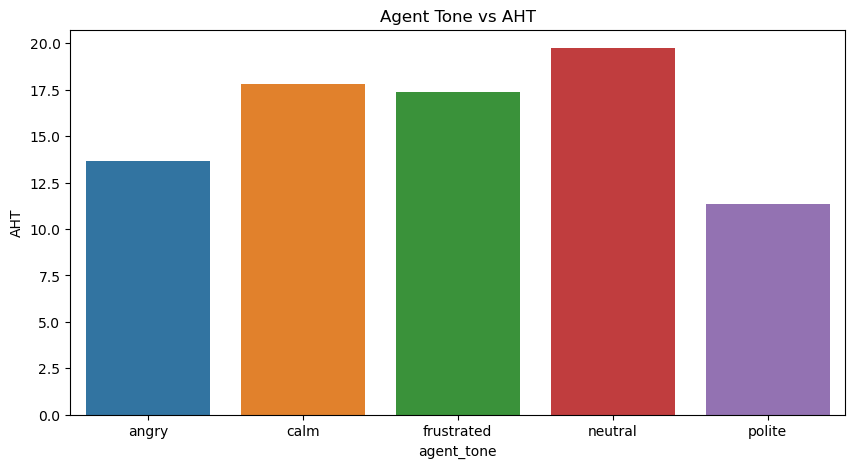

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(x='agent_tone', y='AHT', data=agent_tone_analysis)
plt.title('Agent Tone vs AHT')
plt.show()

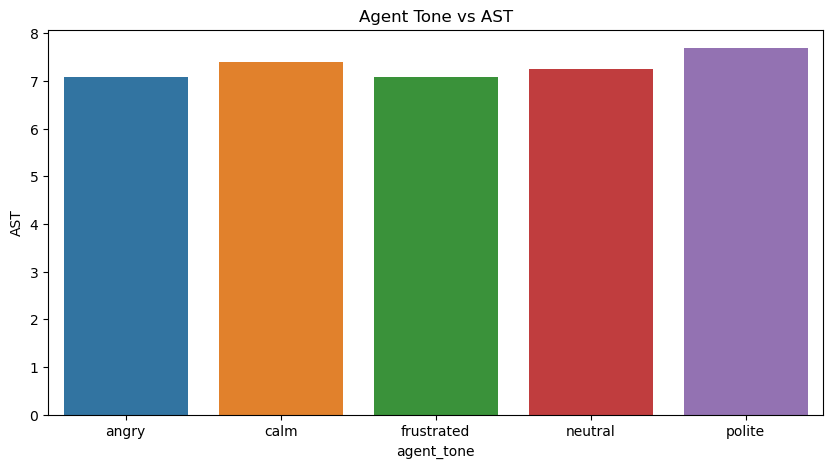

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(x='agent_tone', y='AST', data=agent_tone_analysis)
plt.title('Agent Tone vs AST')
plt.show()

Plot for customer_tone vs AHT and AST

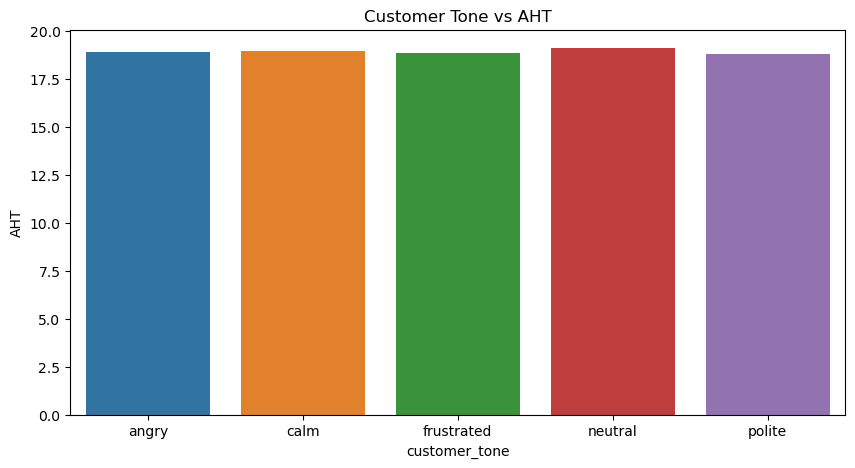

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(x='customer_tone', y='AHT', data=customer_tone_analysis)
plt.title('Customer Tone vs AHT')
plt.show()

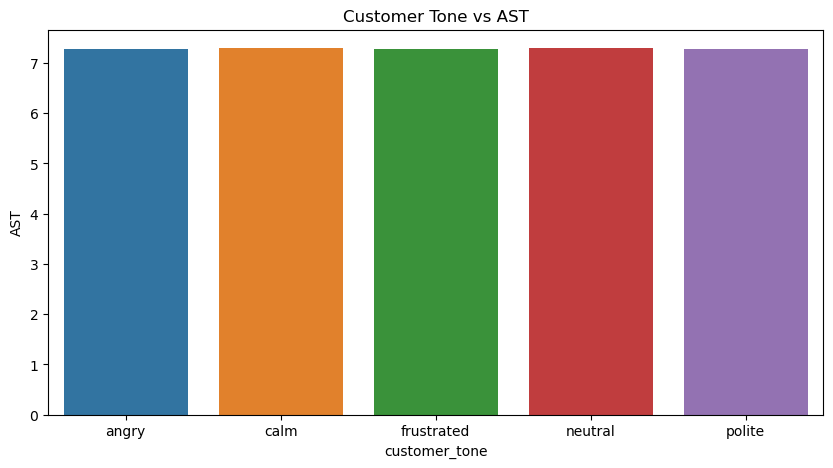

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(x='customer_tone', y='AST', data=customer_tone_analysis)
plt.title('Customer Tone vs AST')
plt.show()

Plot for average_sentiment vs AHT and AST

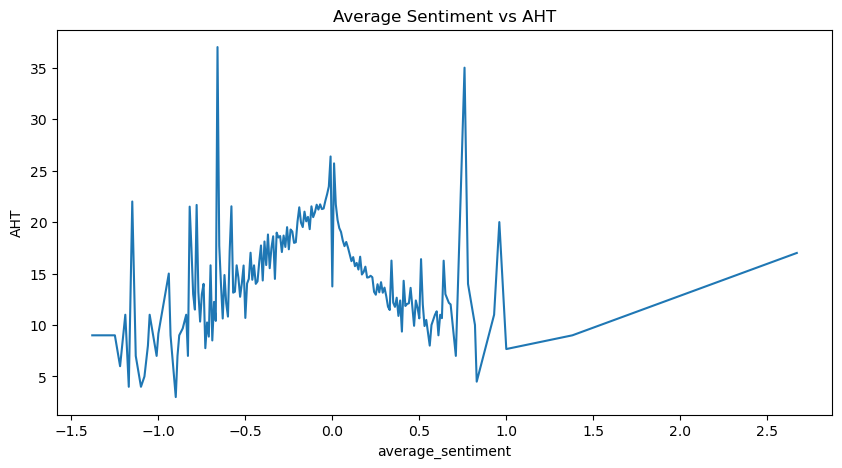

In [47]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='average_sentiment', y='AHT', data=sentiment_analysis)
plt.title('Average Sentiment vs AHT')
plt.show()

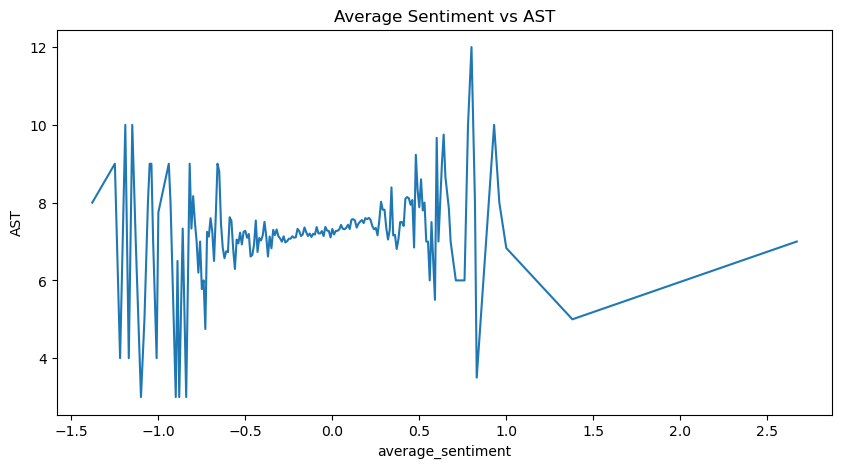

In [48]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='average_sentiment', y='AST', data=sentiment_analysis)
plt.title('Average Sentiment vs AST')
plt.show()

In [49]:
merged_data.to_csv('merged_call_sentiment_data.csv', index=False)

2. Analyzing the correlation between silence_percent_average, AHT, and average_sentiment<br>
Correlation matrix to see the relationships

In [50]:
corr_matrix = merged_data[['silence_percent_average', 'AHT', 'average_sentiment']].corr()

Displaying the correlation matrix

In [51]:
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                          silence_percent_average       AHT  average_sentiment
silence_percent_average                 1.000000  0.399125           0.035339
AHT                                     0.399125  1.000000          -0.067372
average_sentiment                       0.035339 -0.067372           1.000000


Visualizing the effect of silence on AHT and sentiment

In [52]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Scatter plot: Silence Percent vs AHT

Text(0, 0.5, 'AHT (in minutes)')

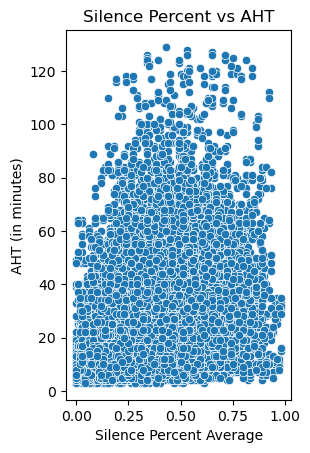

In [53]:
plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_data, x='silence_percent_average', y='AHT')
plt.title('Silence Percent vs AHT')
plt.xlabel('Silence Percent Average')
plt.ylabel('AHT (in minutes)')

Scatter plot: Silence Percent vs Sentiment

Text(0, 0.5, 'Average Sentiment')

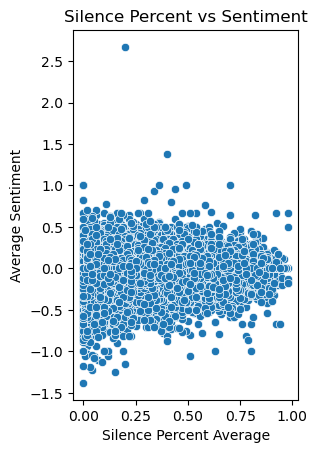

In [54]:
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_data, x='silence_percent_average', y='average_sentiment')
plt.title('Silence Percent vs Sentiment')
plt.xlabel('Silence Percent Average')
plt.ylabel('Average Sentiment')

In [55]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Statistical analysis: Grouping by silence_percent_average quartiles to see the impact on AHT and sentiment

In [56]:
merged_data['silence_quartile'] = pd.qcut(merged_data['silence_percent_average'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

In [57]:
grouped_stats = merged_data.groupby('silence_quartile')[['AHT', 'average_sentiment']].mean()
print("\nGrouped statistics by Silence Quartile:\n", grouped_stats)


Grouped statistics by Silence Quartile:
                         AHT  average_sentiment
silence_quartile                              
Low               12.728831          -0.046069
Medium-Low        16.639160          -0.028566
Medium-High       20.657595          -0.027926
High              26.103573          -0.030756


Saving the updated dataset with AHT and silence analysis

In [58]:
output_file_path = "updated_merged_dataset_with_silence_analysis.csv"
merged_data.to_csv(output_file_path, index=False)
print(f"Updated dataset saved to {output_file_path}")

Updated dataset saved to updated_merged_dataset_with_silence_analysis.csv


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [60]:
dl = pd.read_csv("updated_merged_dataset_with_silence_analysis.csv")

In [61]:
dk = pd.read_csv("reason18315ff.csv")

In [62]:
merged_data1 = pd.merge(dl, dk, on='call_id', how='inner')

In [63]:
print(merged_data1.head())

      call_id  customer_id  agent_id_x  call_start_datetime  \
0  4667960400   2033123310      963118  2024-07-31 23:56:00   
1  1122072124   8186702651      519057  2024-08-01 00:03:00   
2  6834291559   2416856629      158319  2024-07-31 23:59:00   
3  2266439882   1154544516      488324  2024-08-01 00:05:00   
4  1211603231   5214456437      721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0     2024-08-01 00:03:00  2024-08-01 00:34:00   
1     2024-08-01 00:06:00  2024-08-01 00:18:00   
2     2024-08-01 00:07:00  2024-08-01 00:26:00   
3     2024-08-01 00:10:00  2024-08-01 00:17:00   
4     2024-08-01 00:14:00  2024-08-01 00:23:00   

                                     call_transcript    call_duration  \
0  \n\nAgent: Thank you for calling United Airlin...  0 days 00:38:00   
1  \n\nAgent: Thank you for calling United Airlin...  0 days 00:15:00   
2  \n\nAgent: Thank you for calling United Airlin...  0 days 00:27:00   
3  \n\nAgent: Thank you for 

Inspecting the Data

In [64]:
print(merged_data1.head())

      call_id  customer_id  agent_id_x  call_start_datetime  \
0  4667960400   2033123310      963118  2024-07-31 23:56:00   
1  1122072124   8186702651      519057  2024-08-01 00:03:00   
2  6834291559   2416856629      158319  2024-07-31 23:59:00   
3  2266439882   1154544516      488324  2024-08-01 00:05:00   
4  1211603231   5214456437      721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0     2024-08-01 00:03:00  2024-08-01 00:34:00   
1     2024-08-01 00:06:00  2024-08-01 00:18:00   
2     2024-08-01 00:07:00  2024-08-01 00:26:00   
3     2024-08-01 00:10:00  2024-08-01 00:17:00   
4     2024-08-01 00:14:00  2024-08-01 00:23:00   

                                     call_transcript    call_duration  \
0  \n\nAgent: Thank you for calling United Airlin...  0 days 00:38:00   
1  \n\nAgent: Thank you for calling United Airlin...  0 days 00:15:00   
2  \n\nAgent: Thank you for calling United Airlin...  0 days 00:27:00   
3  \n\nAgent: Thank you for 

In [65]:
print(merged_data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66653 entries, 0 to 66652
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  66653 non-null  int64  
 1   customer_id              66653 non-null  int64  
 2   agent_id_x               66653 non-null  int64  
 3   call_start_datetime      66653 non-null  object 
 4   agent_assigned_datetime  66653 non-null  object 
 5   call_end_datetime        66653 non-null  object 
 6   call_transcript          66653 non-null  object 
 7   call_duration            66653 non-null  object 
 8   agent_response_time      66653 non-null  object 
 9   agent_id_y               66653 non-null  int64  
 10  agent_tone               66455 non-null  object 
 11  customer_tone            66653 non-null  object 
 12  average_sentiment        66552 non-null  float64
 13  silence_percent_average  66653 non-null  float64
 14  AHT                   

Handling Missing Values (if any)<br>

In [66]:
merged_data1.fillna(method='ffill', inplace=True)

Saving the updated dataset with AHT and silence analysis

In [67]:
output_file_path = "updated_merged_data1_merged_reasons.csv"
merged_data1.to_csv(output_file_path, index=False)
print(f"Updated dataset saved to {output_file_path}")

Updated dataset saved to updated_merged_data1_merged_reasons.csv


In [106]:

file_path = "updated_merged_data1_merged_reasons.csv"
data = pd.read_csv(file_path)


call_reason_counts = data['primary_call_reason'].value_counts()


most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

average_aht_most_frequent = data[data['primary_call_reason'] == most_frequent_reason]['AHT'].mean()
average_aht_least_frequent = data[data['primary_call_reason'] == least_frequent_reason]['AHT'].mean()

percentage_difference = ((average_aht_most_frequent - average_aht_least_frequent) / average_aht_least_frequent) * 100

print(f"Most Frequent Call Reason: {most_frequent_reason} with Average AHT = {average_aht_most_frequent:.2f}")
print(f"Least Frequent Call Reason: {least_frequent_reason} with Average AHT = {average_aht_least_frequent:.2f}")
print(f"Percentage Difference in Average AHT between the Most and Least Frequent Call Reasons: {percentage_difference:.2f}%")


Most Frequent Call Reason: IRROPS with Average AHT = 19.09
Least Frequent Call Reason: Unaccompanied Minor   with Average AHT = 15.00
Percentage Difference in Average AHT between the Most and Least Frequent Call Reasons: 27.30%


Feature Selection<br>
Selecting the relevant features for the model<br>
Here we're using agent_tone, customer_tone, and other features to predict primary_call_reason

In [68]:
features = ['agent_tone', 'customer_tone', 'average_sentiment', 'silence_percent_average']
target = 'primary_call_reason'  

Encoding Categorical Columns

In [69]:
label_encoder = LabelEncoder()

Applying label encoding to categorical features

In [70]:
merged_data1['agent_tone'] = label_encoder.fit_transform(merged_data1['agent_tone'])
merged_data1['customer_tone'] = label_encoder.fit_transform(merged_data1['customer_tone'])

Applying label encoding to the target variable (primary_call_reason)

In [71]:
merged_data1['primary_call_reason'] = label_encoder.fit_transform(merged_data1['primary_call_reason'])

Train-Test Split

In [72]:
X = merged_data1[features]  # Features
y = merged_data1[target]    # Target column (primary_call_reason)

Splitting the data into training and testing sets (80% train, 20% test)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Random Forest Classifier

In [74]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Making Predictions

In [75]:
y_pred = clf.predict(X_test)

Evaluating the Model

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.13


Generating classification report for detailed performance

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.07      0.06      0.06       554
           2       0.00      0.00      0.00        29
           3       0.05      0.04      0.04       497
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        76
           6       0.03      0.02      0.03       276
           7       0.00      0.00      0.00         7
           8       0.02      0.01      0.02       373
           9       0.00      0.00      0.00        11
          10       0.07      0.07      0.07       746
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        32
          13       0.00      0.00      0.00        19
          14       0.04      0.02      0.03       202
          15       0.00      0.00      0.00         2
          16       0.05      0.02      0.03        84
          17       0.00    

Saving the Model

In [78]:
import joblib
joblib.dump(clf, 'random_forest_model.pkl')  # Save the trained model for later use

['random_forest_model.pkl']

Saving the Label Encoder

In [79]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [80]:
de = pd.read_csv('updated_merged_data1_merged_reasons.csv')

Group calls by primary_call_reason and average_sentiment, and calculate mean AHT, AST, and call count

In [81]:
grouped_data = de.groupby(['primary_call_reason', 'average_sentiment']).agg({
    'AHT': ['mean', 'count'],
    'AST': ['mean']
}).reset_index()

Renaming columns for better readability

In [82]:
grouped_data.columns = ['primary_call_reason', 'average_sentiment', 'mean_AHT', 'call_count', 'mean_AST']

Displaying grouped data to inspect the trends

In [83]:
print(grouped_data)

     primary_call_reason  average_sentiment  mean_AHT  call_count  mean_AST
0                Baggage              -0.55      12.0           1       9.0
1                Baggage              -0.33      11.5           2       7.5
2                Baggage              -0.31      16.0           1      10.0
3                Baggage              -0.24      12.0           1      10.0
4                Baggage              -0.21      11.0           1       8.0
...                  ...                ...       ...         ...       ...
3234  Voluntary Change                 0.22      16.0           1       7.0
3235  Voluntary Change                 0.26      30.0           1      11.0
3236  Voluntary Change                 0.36      15.0           1      11.0
3237  Voluntary Change                 0.38      11.0           1       9.0
3238  Voluntary Change                 0.40      11.0           1      11.0

[3239 rows x 5 columns]


Setting a threshold for considering a "long" AHT (e.g., greater than 300 seconds)

In [84]:
long_AHT_calls = grouped_data[grouped_data['mean_AHT'] > 3]  # Example threshold of 3 seconds can  be edited

Similarly,filtering for AST

In [85]:
long_AST_calls = grouped_data[grouped_data['mean_AST'] > 6]  # Example threshold of 6 seconds, can be edited

Printing the result for longer AHT and AST calls

In [86]:
print("Calls with long AHT:")
print(long_AHT_calls)

Calls with long AHT:
     primary_call_reason  average_sentiment  mean_AHT  call_count  mean_AST
0                Baggage              -0.55      12.0           1       9.0
1                Baggage              -0.33      11.5           2       7.5
2                Baggage              -0.31      16.0           1      10.0
3                Baggage              -0.24      12.0           1      10.0
4                Baggage              -0.21      11.0           1       8.0
...                  ...                ...       ...         ...       ...
3234  Voluntary Change                 0.22      16.0           1       7.0
3235  Voluntary Change                 0.26      30.0           1      11.0
3236  Voluntary Change                 0.36      15.0           1      11.0
3237  Voluntary Change                 0.38      11.0           1       9.0
3238  Voluntary Change                 0.40      11.0           1      11.0

[3235 rows x 5 columns]


In [87]:
print("\nCalls with long AST:")
print(long_AST_calls)


Calls with long AST:
     primary_call_reason  average_sentiment  mean_AHT  call_count  mean_AST
0                Baggage              -0.55      12.0           1       9.0
1                Baggage              -0.33      11.5           2       7.5
2                Baggage              -0.31      16.0           1      10.0
3                Baggage              -0.24      12.0           1      10.0
4                Baggage              -0.21      11.0           1       8.0
...                  ...                ...       ...         ...       ...
3234  Voluntary Change                 0.22      16.0           1       7.0
3235  Voluntary Change                 0.26      30.0           1      11.0
3236  Voluntary Change                 0.36      15.0           1      11.0
3237  Voluntary Change                 0.38      11.0           1       9.0
3238  Voluntary Change                 0.40      11.0           1      11.0

[2069 rows x 5 columns]


Defining routine call reasons that can be handled by IVR

In [94]:
ivr_friendly_reasons = [
    'Baggage',
    'Booking',
    'Check In',
    'Checkout',
    'Digital Support',
    'Mileage Plus',
    'Post Flight',
    'Products & Services',
    'Schedule Change',
    'Seating',
    'Upgrade',
    'Voluntary Change',
    'Voluntary Cancel'
]


Filtering calls that can be routed to IVR (0/>0 sentiment and routine call reasons)

In [95]:
ivr_friendly_calls = grouped_data[
    (grouped_data['average_sentiment'] >= 0) &
    (grouped_data['primary_call_reason'].isin(ivr_friendly_reasons))
]

Displaying calls that are IVR-friendly

In [96]:
print("\nCalls that can be routed to IVR:")
print(ivr_friendly_calls)


Calls that can be routed to IVR:
     primary_call_reason  average_sentiment   mean_AHT  call_count   mean_AST
106              Baggage               0.00  12.315789         551   8.956443
107              Baggage               0.01  18.590909          22   8.409091
108              Baggage               0.02  21.055556          36   9.388889
109              Baggage               0.03  15.326087          46   9.217391
110              Baggage               0.04  15.490909          55   9.181818
...                  ...                ...        ...         ...        ...
3184    Voluntary Change               0.57  14.000000           1  11.000000
3185    Voluntary Change               0.60  13.000000           1  11.000000
3186    Voluntary Change               0.62  11.000000           1   8.000000
3187    Voluntary Change               0.65  17.000000           1   9.000000
3188    Voluntary Change               0.96  20.000000           1   8.000000

[554 rows x 5 columns]


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [98]:
print(de.head())

      call_id  customer_id  agent_id_x  call_start_datetime  \
0  4667960400   2033123310      963118  2024-07-31 23:56:00   
1  1122072124   8186702651      519057  2024-08-01 00:03:00   
2  6834291559   2416856629      158319  2024-07-31 23:59:00   
3  2266439882   1154544516      488324  2024-08-01 00:05:00   
4  1211603231   5214456437      721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0     2024-08-01 00:03:00  2024-08-01 00:34:00   
1     2024-08-01 00:06:00  2024-08-01 00:18:00   
2     2024-08-01 00:07:00  2024-08-01 00:26:00   
3     2024-08-01 00:10:00  2024-08-01 00:17:00   
4     2024-08-01 00:14:00  2024-08-01 00:23:00   

                                     call_transcript    call_duration  \
0  \n\nAgent: Thank you for calling United Airlin...  0 days 00:38:00   
1  \n\nAgent: Thank you for calling United Airlin...  0 days 00:15:00   
2  \n\nAgent: Thank you for calling United Airlin...  0 days 00:27:00   
3  \n\nAgent: Thank you for 

Step 1: Vectorize the call transcript using TF-IDF

In [99]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(de['call_transcript'])

Step 2: Apply LDA for topic modeling (to detect frequent call reasons)

In [100]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

Step 3: Display common terms for each topic (potential frequent call reasons)

In [101]:
terms = tfidf_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))

Topic #0:
let united delays experience voucher refund delay flight agent customer
Topic #1:
let aisle bag standby economy flight customer agent upgrade seat
Topic #2:
frustration delay like meeting sir let tomorrow customer agent flight
Topic #3:
just let check wanted time forecast weather customer agent flight
Topic #4:
need help work date let fee customer agent change flight


Grouping the data by call reason and sentiment to check AHT trends

In [102]:
# Converting the call_duration column to a timedelta format
de['call_duration'] = pd.to_timedelta(de['call_duration'])

# Now performing the groupby operation with mean aggregation
grouped_data1 = de.groupby(['primary_call_reason', 'average_sentiment']).agg(
    avg_call_duration=pd.NamedAgg(column='call_duration', aggfunc='mean')
).reset_index()


Display the grouped data

In [103]:
print(grouped_data1)

     primary_call_reason  average_sentiment avg_call_duration
0                Baggage              -0.55   0 days 00:12:00
1                Baggage              -0.33   0 days 00:11:30
2                Baggage              -0.31   0 days 00:16:00
3                Baggage              -0.24   0 days 00:12:00
4                Baggage              -0.21   0 days 00:11:00
...                  ...                ...               ...
3234  Voluntary Change                 0.22   0 days 00:16:00
3235  Voluntary Change                 0.26   0 days 00:30:00
3236  Voluntary Change                 0.36   0 days 00:15:00
3237  Voluntary Change                 0.38   0 days 00:11:00
3238  Voluntary Change                 0.40   0 days 00:11:00

[3239 rows x 3 columns]


Function to suggest IVR routes for frequent issues

In [104]:
def suggest_ivr_options(grouped_data1):
    for index, row in grouped_data1.iterrows():
        call_reason = row['primary_call_reason']
        sentiment = row['average_sentiment']
        avg_duration = row['avg_call_duration']
        
        avg_duration_seconds = avg_duration.total_seconds()

        # If the average call duration is less than a threshold, suggesting IVR routing
        if avg_duration_seconds < 400:  # Threshold of 400 seconds, can edit based on your choice
            print(f"Suggest routing '{call_reason}' to IVR system. Sentiment: {sentiment}, AHT: {avg_duration_seconds} sec")
        else:
            print(f"'{call_reason}' may require agent intervention. Sentiment: {sentiment}, AHT: {avg_duration_seconds} sec")

Applying the suggestion function

In [105]:
suggest_ivr_options(grouped_data1)

' Baggage' may require agent intervention. Sentiment: -0.55, AHT: 720.0 sec
' Baggage' may require agent intervention. Sentiment: -0.33, AHT: 690.0 sec
' Baggage' may require agent intervention. Sentiment: -0.31, AHT: 960.0 sec
' Baggage' may require agent intervention. Sentiment: -0.24, AHT: 720.0 sec
' Baggage' may require agent intervention. Sentiment: -0.21, AHT: 660.0 sec
' Baggage' may require agent intervention. Sentiment: -0.2, AHT: 600.0 sec
' Baggage' may require agent intervention. Sentiment: -0.19, AHT: 1500.0 sec
' Baggage' may require agent intervention. Sentiment: -0.17, AHT: 1080.0 sec
' Baggage' may require agent intervention. Sentiment: -0.15, AHT: 780.0 sec
' Baggage' may require agent intervention. Sentiment: -0.14, AHT: 720.0 sec
' Baggage' may require agent intervention. Sentiment: -0.13, AHT: 660.0 sec
' Baggage' may require agent intervention. Sentiment: -0.12, AHT: 888.0 sec
' Baggage' may require agent intervention. Sentiment: -0.11, AHT: 1110.0 sec
' Baggage'